In [5]:
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')


<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Introducing the Discrete Fourier Transform

* **Emne AIS2201 - Signalbehandling**
* **Uke 37, 2024**
* **Underviser: Kai Erik Hoff**


# Tema
* Repetisjon sampling i frekvensdomenet
* Intro til frekvensanalyse
* Repetisjon Frekvensdomene-representasjon av sinusformede signal
* Diskret Fouriertransformasjon
    * DFT og fourierrekke-dekomposisjon - hva er forskjellig?
    * DFT-summen
    * Hva er en DFT-sekvens?
* Fast Fourier Transformasjon
* Frekvensanalyse med FFT

## Recap: frequency analysis

* Involves the transformation of a time-domain signal $x(t)$ to a frequency-domain representation $X(\omega)$
* Frekvensanalyse innebærer å transformere et signal $x(t)$ fra tidsdomenet til frekvendomenet.
<img src="figures/Fig1_Frekvensanalyse.png" style="width: 80%; margin-left: 100px" />

# Eksempel på Bruksområde

* Kartlegging av interferens

<img src="figures/Fig2_Interferens.jpg" style="width: 50%; margin-left: 100px" />

## Recap: frequency domain representation

* Kartlegging av amplitude og fase til alle frekvenskomponentene som utgjør et signal $x(t)$.
* Oppnås ved å *fouriertransformere* et signal $x(t)$

$$ X(\omega) = \int_{-\infty}^{\infty} x(t) \cdot e^{-j \omega t} dt $$

* Fouriertransformasjon produserer et komplekst uttrykk $X(\omega)$, gitt som funksjon av vinkelfrekvens $\omega$.
    - Styrkegraden til en frekvenskomponent med vinkelfrekvens $\omega$ er gitt ved $\left| X(\omega)\right|$.
    - Fasen til en frekvenskomponent med vinkelfrekvens $\omega$ er gitt ved $\angle X(\omega)$.

## Interaktivt plot: frekvensrepresentasjon av sinusbølge

Output()

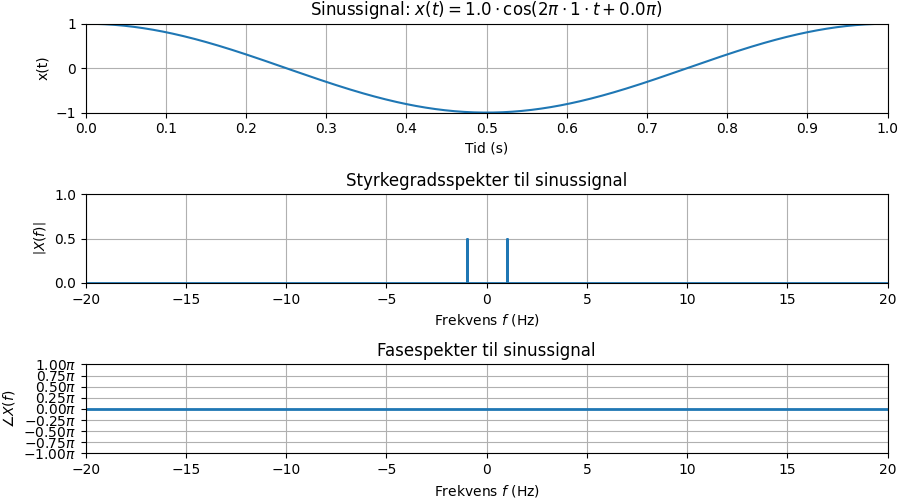

In [6]:
from demos import SinusoidSpectrumDemo
%matplotlib ipympl
SinusoidSpectrumDemo(1)

# The "Fourier Pantheon"

<img src="figures/Fig3_FourierTransforms.png" style="width: 80%; margin-left: 100px" />

# Frequency analysis of discrete-time signals

* Fourier transformation forms the basis for frequency analysis
* Obtained by computation
    - Finite number of datapoints
    - Discrete-time input $x[n]$
* Frequency analysis of a discrete-time signal $x[n]$ confined to $f \in \left( -\frac{f_s}{2},\frac{f_s}{2} \right)$
    - $\hat{\omega} \in (-\pi, \pi)$
 

<img src="figures/Fig9_SpectralSamling2.png" style="width: 70%; margin-left: 100px" />

## Recap: fourier series

* En "liste" med komplekse verdier, der hvert element forteller $Amplituden$ og $Fasen$ til alle *komplekse eksponential-funksjoner* $A_k\cdot e^{j(\omega_k \cdot t+ \phi_k)}$ som til sammen utgjør et sammensatt signal.

* Frekvensen $\omega_k$ til hver av komponentene er gitt ved rekkens posisjonsvariabel $k$. Denne forteller hvor mange fulle rotasjoner de utfører i løpet av analyseintervallet $T_0$ (grunnperioden).

$$\omega_k = 2\pi \cdot \frac{k}{T_0}$$

* Kort fortalt er en fourier-rekke en *diskret* representasjon av et signal $x(t)$ i frekvensdomenet.

|$k:$|$-4$|$-3$|$-2$|$-1$|$0$|$1$|$2$|$3$|$4$|
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|$c_k:$| $\frac{j}{4\pi}$|$\frac{j}{3\pi}$|$\frac{j}{2\pi}$|$\frac{j}{\pi}$|$0$|$\frac{-j}{\pi}$|$\frac{-j}{2\pi}$|$\frac{-j}{3\pi}$|$\frac{-j}{4\pi}$|
* Vi kan plotte fourierrekken som et frekvensplot: la grunnfrekvensn $f_0 = 20Hz$

<img src="figures/FourierSeries.png" style="width: 70%; margin-left: 150px" />

## Fourierrekke-dekomposisjon oppsummert

1. Observer et signal over et tidsvindu $T_0$.
2. Bruk frekvensforskyvning til å plukke ut sinusbølgene som fullfører 0, 1, 2, 3, 4, 5 osv... fulle perioder i løpet av tidsintervallet $T_0$.
3. Fortsetter i det uendelige.

* Vi kan gjøre *nesten* det samme med digitale signal.

# Diskret Fouriertransformasjon (DFT)

1. Observer et signal over et sampleintervall $N$.
2. Bruk frekvensforskyvning til å plukke ut sinussekvensene som fullfører 0, 1, 2, 3, 4, 5 osv.. fulle svingninger i løpet av et sampleintervall $N$.

<img src="figures/Fig2_DFT_IO.png" style="width: 100%; margin-left: 0px" />

# Diskret Fouriertransformasjon (DFT)

* Formel:
$$X[m] = \sum_{n=0}^{N-1}x[n]\cdot e^{-j\cdot 2\pi \frac{m\cdot n}{N}} $$
    * Der $m$ er en arbitrær heltallsvariabel
    
    
* Ligner på fourierrekke-dekomposisjon.
* Dekomponerer et digitalt signal basert på et sample-intervall $N$.
* Gir en sekvens med komplekse amplituder for frekvensene
$$\hat{\omega}_m = \frac{2\pi \cdot m}{N}$$
* Sekvensen $X[m]$ vil være periodisk over $N$ sampler.

* Valget av å bruke $m$ som indeksvariabel er på grunn av boka. Det er ingen praktisk forskjell mellom å bruke $m$ og for eksempel $k$ som du vil til tider vil se i f.eks. `scipy`-dokumentasjonen.

* Men skal vi regne ut fouriertransformen for et uendelig stort antall verdier av $m$?

## Kodeeksempel:

$$X[m] = \sum_{n=0}^{N-1}x[n]\cdot e^{-j\cdot 2\pi \frac{m\cdot n}{N}} $$
* Regn ut DFT av signalsamplene $x[n] = \cos\left( \frac{2\pi}{5} \cdot n \right), \ \ \ 0 \leq n < 10$

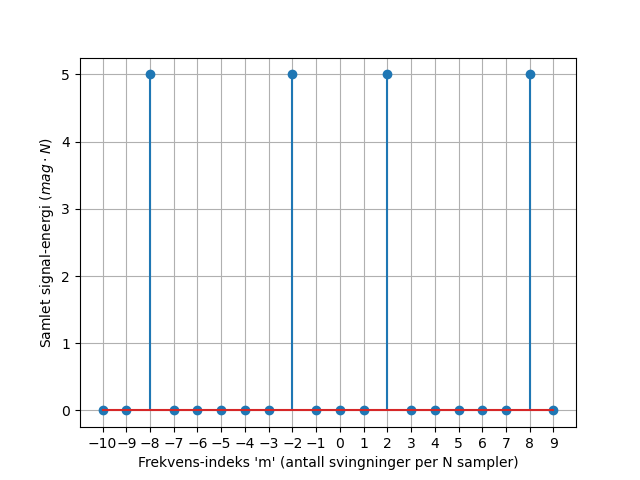

In [3]:
import numpy as np
from numpy import cos, pi, sin, exp 
import matplotlib.pyplot as plt

N = 10
n = np.arange(N)
x = cos(2*pi/5*n)


X = np.zeros(2*N)*1J
for m in range(-N,N):
    X[m] = sum(x*exp(-1j*2*pi*m*n/N))
    
plt.figure()
plt.stem(np.arange(-N,N), np.abs(X))
plt.xticks(np.arange(-N,N))
plt.grid(True)
plt.xlabel("Frekvens-indeks 'm' (antall svingninger per N sampler)")
plt.ylabel(r"Samlet signal-energi ($mag \cdot N$)");

## Eksempel:
* Med utgangspunkt i et signalsegment $x[n]$ med lengde $N=8$ sampler, hvor mange verdier av $m$ må vi regne ut for å kunne angi presentere et *fullstendig* tosidig frekvensspekter?

# DFT-sekvensen

* Vi regner kun ut for heltallsverdier av $m \in \{0, 1, \ldots, N-1\}$.
    * Negative frekvenskomponenter representeres med aliasene i frekvensintervallet $\pi<\hat{\omega}_m < 2\pi$.
    
<img src="figures/Fig4_DFT_1.png" style="width: 85%" />

## Regneeksempel 1

* Tabellen angir 4 sampler av signalet $x[n]$.

|n|0|1|2|3|
|--- |---|---|---|---|
|x\[n\]|2|1|0|1|

* Utfør 4-punkts DFT av signalsamplene til $x[n]$.

# Nøkkelkonsept: oppløsningsbåndbredde
* Avstanden i frekvensplanet mellom hver utregnet frekvenskomponent $\Delta\hat{\omega}$.
* Omvendt proporsjonal med vinduslengden $N$, altså antallet signalsampler som brukes til å regne ut DFT.
$$\Delta \hat{\omega} = \frac{2\pi}{N}$$
* For signal samplet med samplingsfrekvens $f_s$, vil oppløsningsbåndbredden være:
$$\Delta f = \Delta \hat{\omega} \cdot \frac{f_s}{2\pi} = \frac{f_s}{N}$$

# Indeksverdi $m$

* DFT gir en endelig rekke "frekvenssampler", altså sampler av signalets frekvensrepresentasjon.
* Hver frekvenssample har en indeksverdi $m$.
* Vi kan regne ut frekvensen til den aktuelle komponenten ved å ta utgangspunkt i indeksverdien $m$.
* For en $N$-punkts DFT:

$$\hat{\omega}_m = m\cdot \Delta \hat{\omega} = m\cdot \frac{2\pi}{N}$$


$$f_m = m\cdot \Delta f = m\cdot \frac{f_s}{N}$$

# DFT Egenskaper

* Periodisk over $N$ sampler.
$$X[m] = X[m+l\cdot N], \ \ \ l \in \mathbb{Z}$$
* Komplekskonjugert symmetri.
$$X[m] = X[-m]^* = X[N-m]^*$$

* DC-komponent:
    - Tilsvarer $X[0]$.
    - Fase enten $0$ eller $\pi$.
* Midtpunkt $\left( m=\frac{N}{2} \right)$
    - Tilsvarer nøyaktig 2 sampler per periode/svingning av sinuskomponenten.
    - Fase lik $0$ eller $\pi$ (ingen imaginær del).

# Linearitet

* Diskret fouriertransformasjon er en lineær operasjon.
    * Det betyr at den overholder *superposisjonsprinsippet*: <br><br>
$$ \text{DFT}\left(x_1[n] + x_2[n] \right) = X_1[m] + X_2[m]$$<br>
    * der $\alpha_1$ og $\alpha_2$ er vilkårlige konstanter.

* Linearitet illustrert: 

<img src="figures/Fig10_DFT_Linearity.png" style="width: 80%; margin-left: 100px" />

* Uten denne egenskapen ville DFT vert uegnet til å analysere noe annet enn rene sinusbølger.

# Tolkning av DFT: Amplitude
* Relasjon mellom $|X[m]|$ og amplitude på sinuskomponent

<img src="figures/Fig5_DFT_2.png" style="width: 80%; margin-left: 100px" />

# Tolkning av DFT: Fase
* Relasjon mellom $\angle X[m]$ og fase på sinuskomponent

<img src="figures/Fig6_DFT_3.png" width="80%" />

## DFT av sinussekvens

Output()

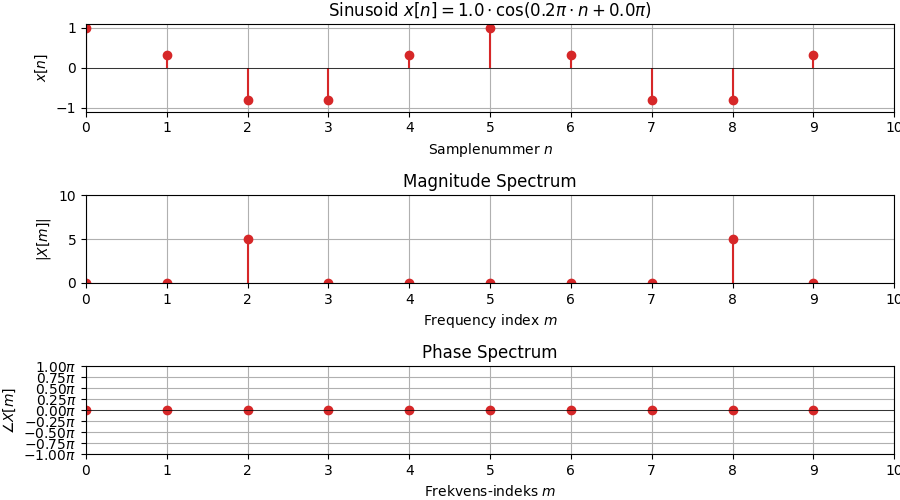

In [4]:
from demos import DFT_Demo
%matplotlib ipympl
DFT_Demo(2);

## Regneeksempel 2

Formelen nedenfor angir DFT av $N=16$ sampler for en sinussekvens $x[n]$.

$$ X[m]= 
\begin{cases}
 4\sqrt{3} -j4, \ \ & m = 3\\
 4\sqrt{3} +j4, \ \ & m = 13\\
 0, & \text{ellers}
\end{cases}
$$

Finn Normalisert Vinkelfrekvens $\hat{\omega}$, Amplitude $A$ og Fase $\phi$ for sinussekvensen $x[n]$.

# Fast Fourier Transform (FFT)

* Effektiv algoritme for utregning av DFT
    - I Python finnes ingen "vanlig" DFT funksjon. Resultatet er nøyaktig det samme med FFT.
    - FFT-funksjonen i `numpy`: [`numpy.fft.fft()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft)
    
    
```python
import numpy as np
x_n = np.array([1, 2, 3, 4, 0, 4, 2 , 5, 3, 1, 4, 2])
X_m = np.fft.fft(x_n)
X_m
```
Gir: 

```Python
array([31.        +0.00000000e+00j, -3.33012702+9.64101615e-01j,
       -0.5       -2.59807621e+00j, -5.        +4.00000000e+00j,
       -3.5       +8.66025404e-01j,  5.33012702-5.96410162e+00j,
       -5.        +2.22044605e-16j,  5.33012702+5.96410162e+00j,
       -3.5       -8.66025404e-01j, -5.        -4.00000000e+00j,
       -0.5       +2.59807621e+00j, -3.33012702-9.64101615e-01j])``` 

## Kodeeksempel 1
* Bruk `fft()` til å regne ut frekvensinnholdet til signalet `x_n` fra datafilen, og vis et tosidig frekvensspekter med *normalisert vinkelfrekvens* langs x-aksen.
    * P.S. funksjonen `numpy.fft.fftshift()` kommer godt med her.

In [5]:
from scipy.io import loadmat
data = loadmat('Datafiler/06_DFT/06_DFT_data.mat', squeeze_me=True)
x_n = data['x2_n']
Fs = data['f_s']

# Andre Spørsmål?